# ***Dataset Description***
This data set contains information about 9000 movies from TMDB API.

---



# ***Columns Descriptions***



1.   Release_Date: Date when the movie was released.
2.   Title: Name of the movie.
3.   Overview: Brief summary of the movie.
4.   Popularity: It is a very important metric computed by TMDB developers      based on the number of views per day, votes per day, number of users marked it as "favorite" and "watchlist" for the data, release date and more other metrics.
5.  Vote_Count: Total votes received from the viewers.
6.  Vote_Average: Average rating based on vote count and the number of viewers out of 10.
7.  Original_Language: Original language of the movies. Dubbed version is not considered to be original language.
8.  Genre: Categories the movie it can be classified as.
9.  Poster_Url: Url of the movie poster.

---



# ***What all to find out?***

* Q1: What is the most frequent genre in the dataset?
* Q2: What genres has highest votes?
* Q3: What movie got the highest popularity? what's its genre?
* Q4: Which year has the most filmmed movies?

---



# ***Set-Up***

In [254]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
#loading the dataset

df=pd.read_csv('data/mymoviedb.csv', engine='python')

#viewing first 5 rows
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...




---



In [256]:
#viewing overall info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB




---


Here we have unwanted ones like `Poster_Url`,`Original_Language`,`Overview`.

So dropping them :

In [257]:
#dropping

if 'Poster_Url' in df.columns:
  df.drop(columns='Poster_Url',inplace=True)
if 'Original_Language' in df.columns:
  df.drop(columns='Original_Language',inplace=True)
if 'Overview' in df.columns:
  df.drop(columns='Overview',inplace=True)



---



In [258]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"




---


***Now checking null values in our data :***

In [259]:
df.isnull().sum()

,0
Release_Date,0
Title,9
Popularity,10
Vote_Count,10
Vote_Average,10
Genre,11


*We can see there are around 10 null values in each.*

---



**Lets find where those nulls occur :**

In [260]:
#finding all nulls in 'Title'

df[df['Title'].isnull()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
1106,- Just Desserts,None,NaN,None,None,None
1107,- If The Hue Fits,None,NaN,None,None,None
1108,- Dust Up,None,NaN,None,None,None
1109,- Scents And Sensibility,None,NaN,None,None,None
1110,- Just One Of The Girls,None,NaN,None,None,None
1111,- Volleybug,None,NaN,None,None,None
1112,- Hide And Tink,None,NaN,None,None,None
1113,- Rainbow's Ends,None,NaN,None,None,None
1114,- Fawn And Games,None,NaN,None,None,None




---


* We can see how the null values occured.
* Since no. of nulls are negligible we are dropping those :

In [261]:
#dropping nulls

df=df.dropna()



---



In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9826 non-null   object 
 1   Title         9826 non-null   object 
 2   Popularity    9826 non-null   float64
 3   Vote_Count    9826 non-null   object 
 4   Vote_Average  9826 non-null   object 
 5   Genre         9826 non-null   object 
dtypes: float64(1), object(5)
memory usage: 537.4+ KB


Now our data is free of nulls.

---



# ***Data Cleaning***

From `Release_Date` we are extracting year.

* First coverting to datatime format.
* Then, from that extracting the year.

---



In [263]:
#datetime format

df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [264]:
#extracting year

df['Release_Date']=df['Release_Date'].dt.year
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"




---



In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9826 non-null   int32  
 1   Title         9826 non-null   object 
 2   Popularity    9826 non-null   float64
 3   Vote_Count    9826 non-null   object 
 4   Vote_Average  9826 non-null   object 
 5   Genre         9826 non-null   object 
dtypes: float64(1), int32(1), object(4)
memory usage: 499.0+ KB


Here we can see `Vote_Count` and `Vote_Average` is not numerical.

---

Converting `Vote_Count` and `Vote_Average` to numericals :

In [266]:
df['Vote_Average']=pd.to_numeric(df['Vote_Average'],errors='coerce')
df['Vote_Count']=pd.to_numeric(df['Vote_Count'],errors='coerce')



---

### ***Now making in a format like one genre per row.***

In [267]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')

# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

# casting column into category
df['Genre'] = df['Genre'].astype('category')

# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)



---

# ***Q1: What is the most frequent genre in the dataset?***

---



In [268]:
genre_counts = df['Genre'].value_counts()

# Display most frequent genre
most_frequent_genre = genre_counts.idxmax()
print(f"Most Frequent Genre: {most_frequent_genre} ({genre_counts.max()} occurrences)")

Most Frequent Genre: Drama (3744 occurrences)




---

Here we can see the most frequent genre is "Drama".


---

### ***Now Visualizing it :***

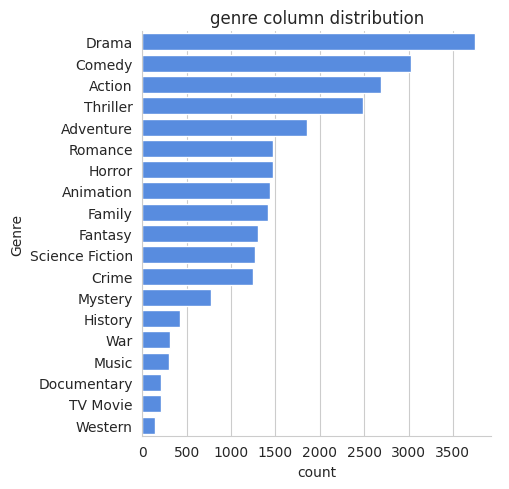

In [269]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('genre column distribution')
plt.tight_layout()
plt.show()



---

# ***Q2: What genres has highest votes?***

---



In [270]:
genre_votes = df.groupby('Genre', observed=True)['Vote_Count'].sum().sort_values(ascending=False)

# Display the top genre
top_genre = genre_votes.idxmax()
top_votes = genre_votes.max()

print(f"The genre with the highest total votes is '{top_genre}' with {top_votes} votes.")

The genre with the highest total votes is 'Drama' with 5141495 votes.




---

***Now looking which is the popular movie based on votings.***

In [271]:
popular_movies = df[df['Vote_Average'] >= 7.5]
print(popular_movies.shape)
popular_movies.head()

(3803, 6)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


Here we can see the popular ones.



---


# ***Q3: What movie got the highest popularity? what's its genre?***


---



In [272]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


**Here we got "Spider-Man: No Way Home" as the popular movie and got its genres.**



---

# ***Q4: Which year has the most filmed movies?***

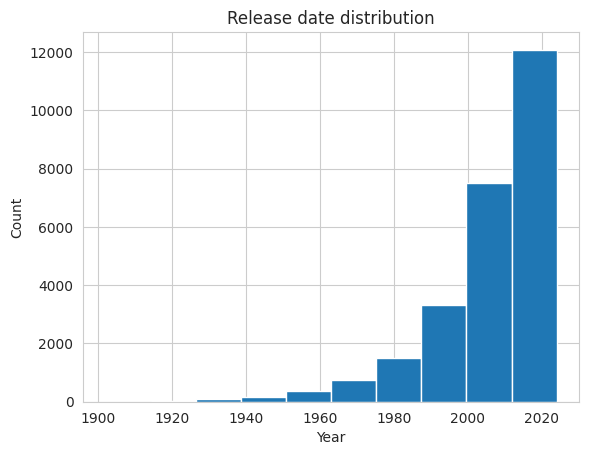

In [273]:
df['Release_Date'].hist()
plt.title('Release date distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

***Here we can see that the year 2020 has filmed most movies.***



---

# ***Conclusion***
* **Q1: What is the most frequent genre in the dataset?**

  Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

* **Q2: What genres has highest votes?**

  We have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

* **Q3: What movie got the highest popularity? what's its genre?**

  Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.

* **Q4: Which year has the most filmmed movies?**

  Year 2020 has the highest filmming rate in our dataset.